In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100 
#import statsmodels.api as sm
#from scipy.stats import boxcox
#

As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively) 
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution?
- For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [2]:
tca = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
tca

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
numerical = tca.select_dtypes(include='number')
categorical = tca.select_dtypes(include='object')

In [4]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [5]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


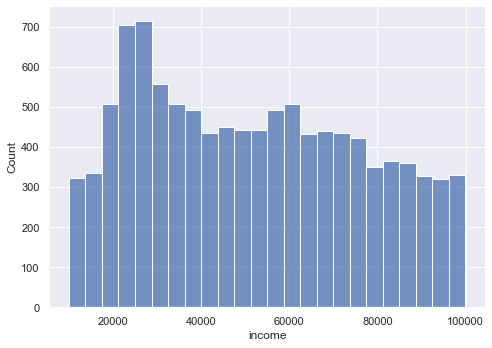

In [28]:
#Just for practice: ploting a single element
sns.displot(data=tca, x= "income", kind= "hist",aspect=1.4)

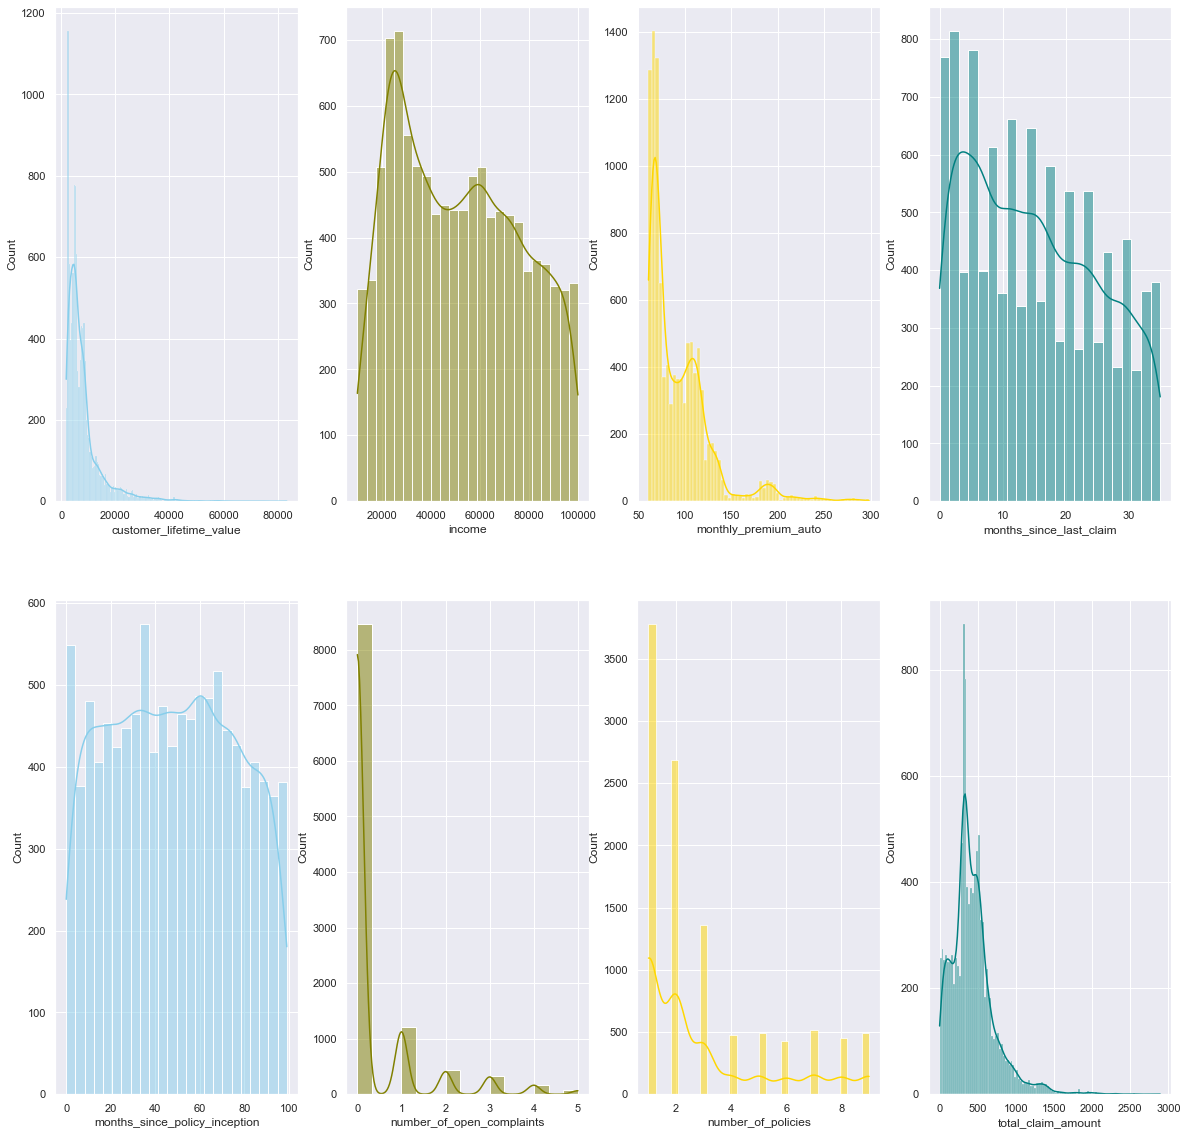

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
#Here I'm using the seaborn library to construct distribution plots for the numerical variables
fig, axs = plt.subplots(2, 4, figsize=(20, 20))

sns.histplot(data=numerical, x="customer_lifetime_value", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=numerical, x="income", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=numerical, x="monthly_premium_auto", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=numerical, x="months_since_last_claim", kde=True, color="teal", ax=axs[0, 3])
sns.histplot(data=numerical, x="months_since_policy_inception", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=numerical, x="number_of_open_complaints", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=numerical, x="number_of_policies", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=numerical, x="total_claim_amount", kde=True, color="teal", ax=axs[1, 3])

plt.show()

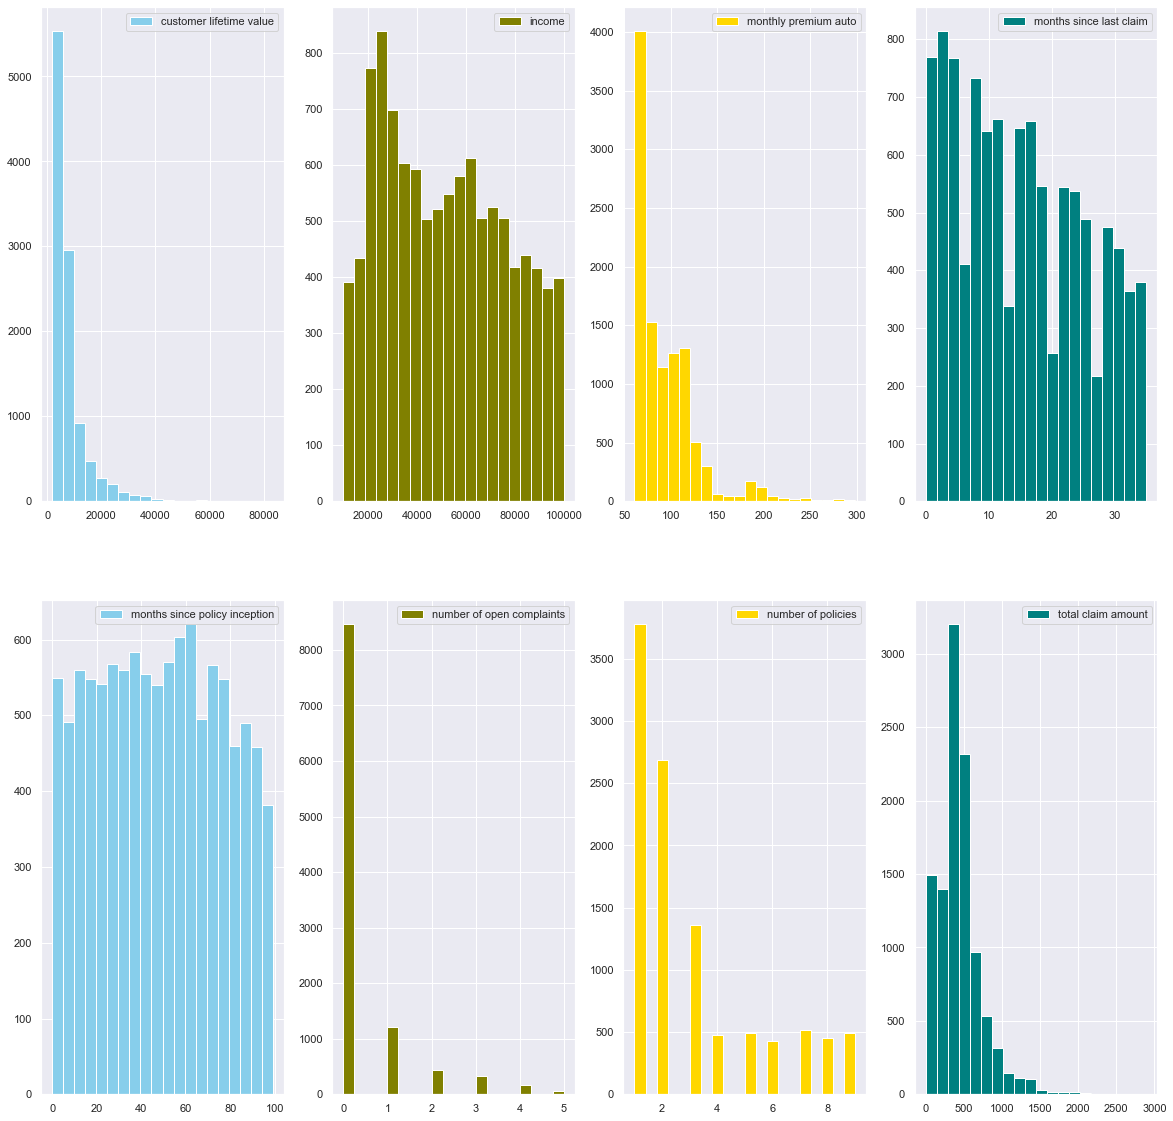

In [7]:
#Here I'm using the Matplotlib library to construct distribution plots for the numerical variables
fig2, axes2 = plt.subplots(2,4,figsize = (20,20))
axes2[0,0].hist(numerical['customer_lifetime_value'],bins=20,color='skyblue', label='customer lifetime value')
axes2[0,1].hist(numerical['income'],bins=20, color='olive',label='income')
axes2[0,2].hist(numerical['monthly_premium_auto'],bins=20, color='gold', label='monthly premium auto')
axes2[0,3].hist(numerical['months_since_last_claim'],bins=20, color='teal',label='months since last claim')
axes2[1,0].hist(numerical['months_since_policy_inception'],bins=20,color='skyblue',label='months since policy inception')
axes2[1,1].hist(numerical['number_of_open_complaints'],bins=20, color='olive',label='number of open complaints')
axes2[1,2].hist(numerical['number_of_policies'],bins=20, color='gold',label='number of policies')
axes2[1,3].hist(numerical['total_claim_amount'],bins=20, color='teal',label='total claim amount')
for a in range(2):
    for b in range(4):
        axes2[a,b].legend()

Do the distributions for different numerical variables look like a normal distribution? No, they don't.

In [8]:
#fig = plt.figure(figsize=(8,5))
#sns.heatmap(numerical.corr(), annot = True) #a heatmap has been created

<AxesSubplot:>

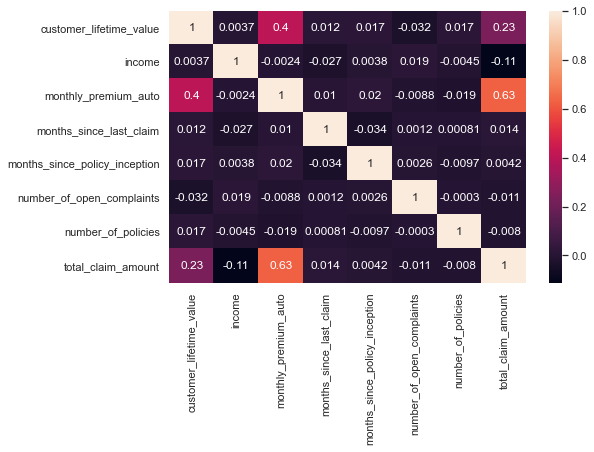

In [9]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(tca.corr(), annot = True) #a heatmap has been created

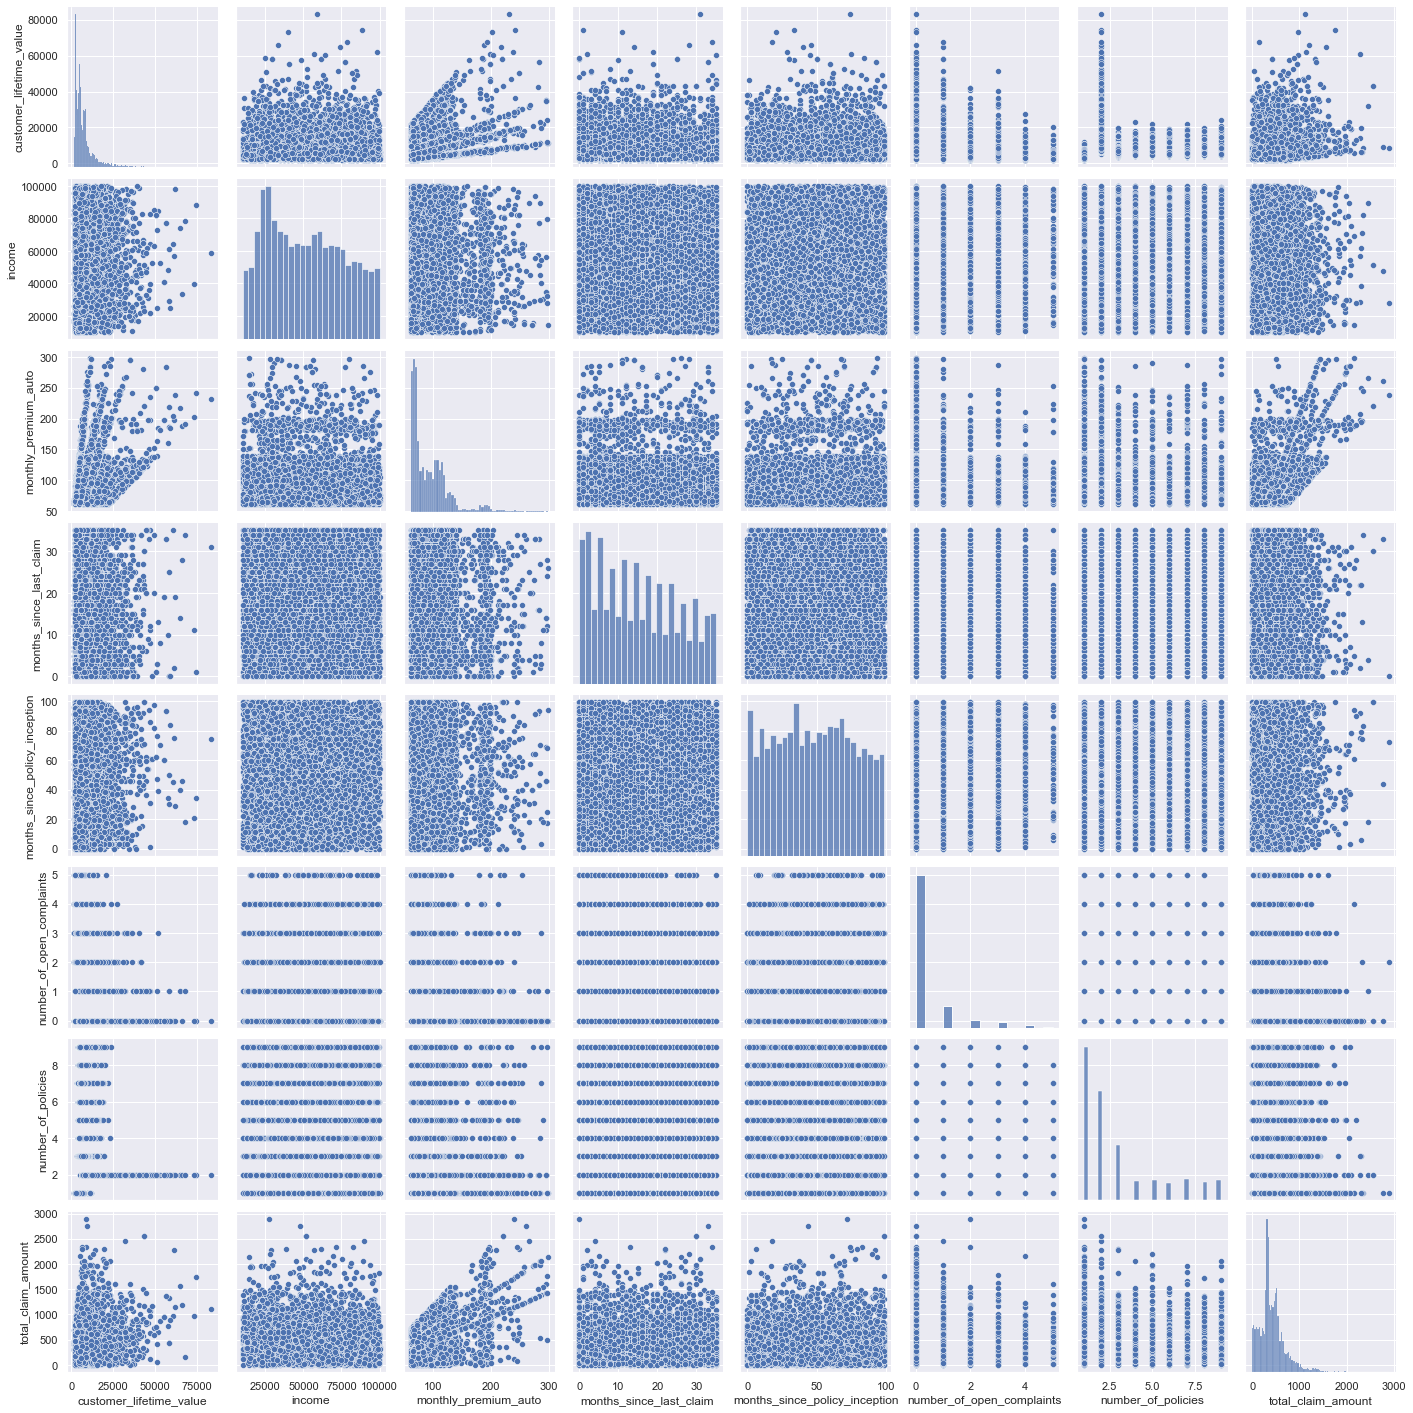

In [10]:
sns.pairplot(numerical)

In [11]:
sns.__version__


'0.11.0'

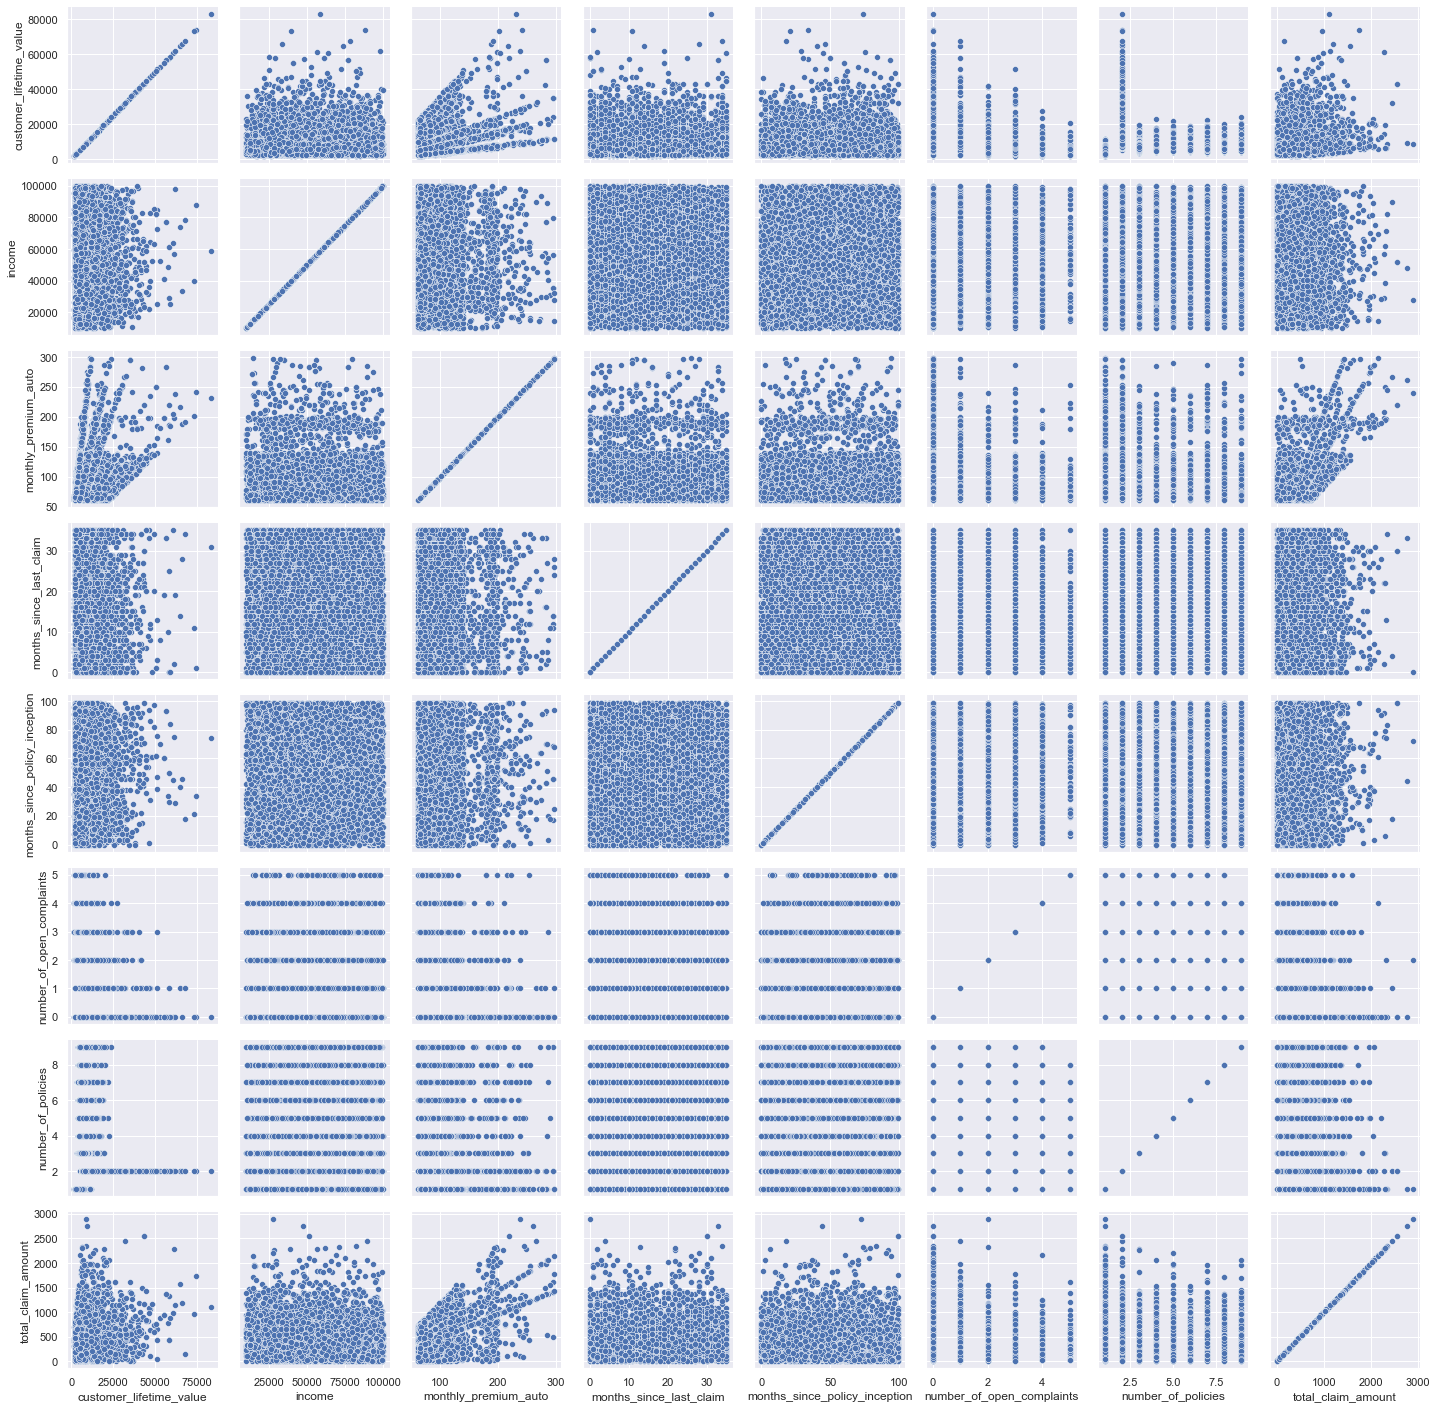

In [12]:
g = sns.PairGrid(numerical)
g.map(sns.scatterplot)

In [13]:
tca['income'].value_counts()

95697    13
27972    10
60920    10
46900     9
97131     9
         ..
11489     1
26744     1
82045     1
44705     1
16384     1
Name: income, Length: 8210, dtype: int64

In [14]:
tca['customer_lifetime_value'].value_counts()

5107     14
6005     14
9095     13
2491     13
8382     13
         ..
26200     1
19597     1
9352      1
15483     1
8196      1
Name: customer_lifetime_value, Length: 5676, dtype: int64

In [15]:
print(tca['customer_lifetime_value'].where(tca['customer_lifetime_value'] < 70000))

0         4809.0
1         2228.0
2        14947.0
3        22332.0
4         9025.0
          ...   
10684    15563.0
10685     5259.0
10686    23893.0
10687    11971.0
10688     6857.0
Name: customer_lifetime_value, Length: 10689, dtype: float64


Activity 4 (Thursday)

Show a plot of the total number of responses.
Show a plot of the response by the sales channel.
Show a plot of the response by the total claim amount.
Show a plot of the response by income.
(Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.
Clean your notebook and make it a readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

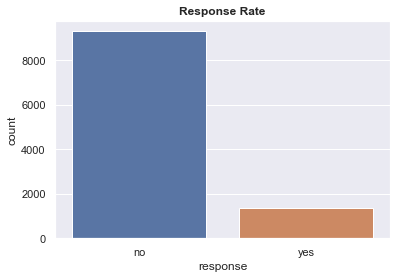

In [16]:
#Show a plot of the total number of responses
sns.countplot(x = 'response', data = tca)
plt.title('Response Rate', fontweight = 'bold')
plt.show()

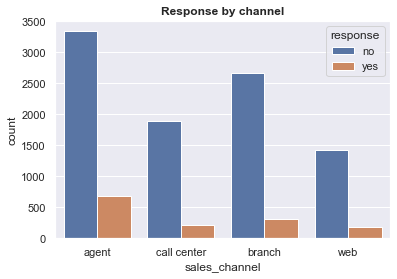

In [17]:
#Show a plot of the response by the sales channel
sns.countplot(x = 'sales_channel', hue = 'response', data = tca)
plt.title('Response by channel', fontweight = 'bold')
plt.show()

In [18]:
#Show a plot of the response by the total claim amount

In [19]:
tca['total_claim_amount'].value_counts()

316     147
292     143
350     137
312     128
331     123
       ... 
1188      1
1148      1
1140      1
1124      1
1644      1
Name: total_claim_amount, Length: 1172, dtype: int64

In [20]:
tca ['rounded_claim_amount'] = tca['total_claim_amount'].apply(round, ndigits = -2)
tca

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,rounded_claim_amount
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,300
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,700
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize,500
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,500
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize,1200
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize,300
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,400
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize,600


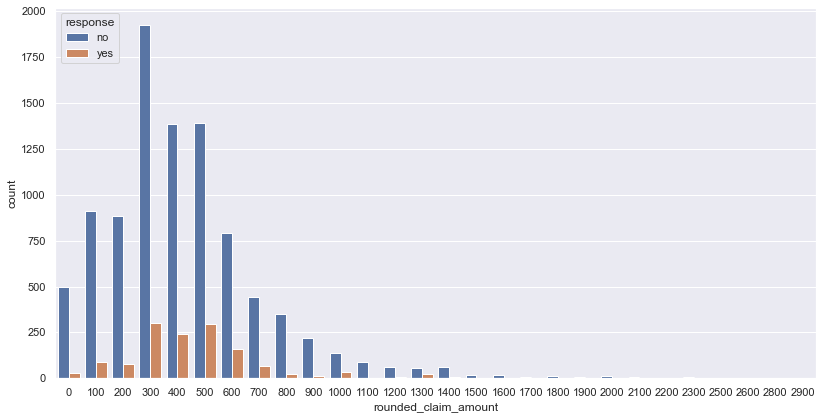

In [21]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.countplot(x ='rounded_claim_amount', hue = 'response', data = tca)
plt.show()

In [22]:
#plt.figure(figsize=(30,15))
#plt.subplot(2,2,1)
#sns.countplot(x ='response', hue= 'rounded_claim_amount', data = tca)
#plt.show()

In [23]:
tca['rounded_claim_amount'].value_counts()

300     2223
500     1690
400     1628
100     1002
200      963
600      955
0        530
700      512
800      376
900      230
1000     173
1100      92
1300      81
1400      71
1200      69
1500      19
1600      16
2000      13
1800      13
1700       9
2300       6
2100       6
1900       5
2200       2
2600       2
2900       1
2500       1
2800       1
Name: rounded_claim_amount, dtype: int64

In [24]:
tca ['rounded_income'] = tca['income'].apply(round, ndigits = -4)
tca

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,rounded_claim_amount,rounded_income
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,300,50000
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,700,90000
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,2,personal auto,personal l3,offer3,call center,480,suv,medsize,500,20000
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,500,50000
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,700,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize,1200,60000
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize,300,60000
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,400,40000
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,6,personal auto,personal l1,offer1,branch,618,suv,medsize,600,60000


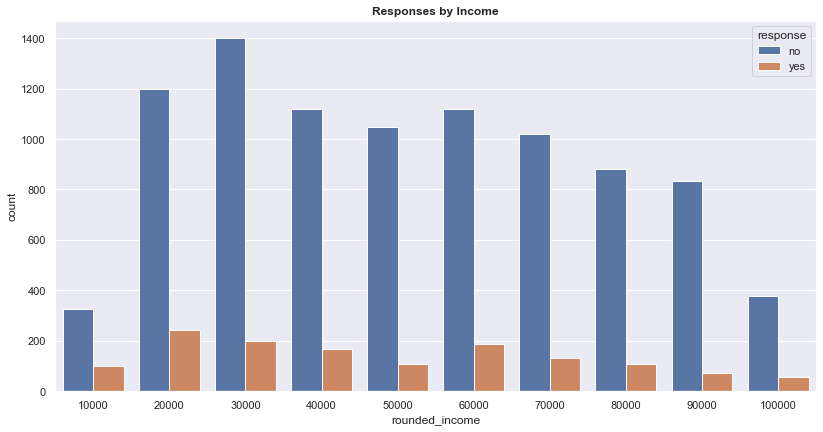

In [25]:
#Show a plot of the response by income
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.countplot(x ='rounded_income', hue = 'response', data = tca)
plt.title('Responses by Income', fontweight = 'bold')
plt.show()